<a href="https://colab.research.google.com/github/gmazzitelli/GSN2/blob/master/plot_google_sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import seaborn as sns
sns.set()
#plt.style.use('fast')
#plt.rc('font', size = 14, family ='Sans-Serif')
def panda_from_gspreadsheet(key, sheet_name='Sheet1', header=0):
  # google spredsheet TO panda dataframe 
  # ricordarsi di abilitare lo sharing pubblico dei dati
  url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
      key=key, sheet_name=sheet_name.replace(' ', '%20'))
  return pd.read_csv(url, header=header)

#https://docs.google.com/spreadsheets/d/1MWRb1xbkpZOmUBLCLaC9ud4htvPEWYC7F8IuTt84YBg/edit?usp=sharing
pd =  panda_from_gspreadsheet('1MWRb1xbkpZOmUBLCLaC9ud4htvPEWYC7F8IuTt84YBg', sheet_name='Sheet1')

def Exp(x, p0, p1): # negative exponential
  import numpy as np
  return p0*np.exp(x/p1)

def Line(x, m, q):
  import numpy as np
  return m*x + q
  
def Gain(x, p0, p1):
  import numpy as np
  return p0*x**p1

In [10]:
pd.tail()

,Timestamp,Email Address,Experiment,DAQ type,Data organization,DAQ rate events/y,Data amount,size KB,Data size,Data structure,...,Storage - POSIX,Storage - access,Tape - size,Tape - access frequency,Tape - inventory,Tape - replicas and backups,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
27,5/3/2022 11:48:25,federico.dipierro@to.infn.it,CTA,triggered,by event,1.040000e+09,Current (2022) data production: 1 telescope ta...,8000.0,100 kB,"RAW, DL0, DL1, DL2, DL3, MC",...,1,Grid certificate,500 TB,A = 0,B = 1,No,NaN,NaN,NaN,NaN
28,5/3/2022 15:00:28,aldo.ianni@lngs.infn.it,SABRE,simulated,by event,6.200000e+03,MC generated 1e10. Real events in the ROI 6200...,1700000.0,Order of 0.7 GByte for physics run. Order of 1...,raw(real + MC) + calibrated + filtered (after ...,...,,Collaborators with LNGS account,At least 120 TB,,,Yes. Yes for a good fraction at present.,NaN,NaN,NaN,NaN
29,5/5/2022 16:28:43,matteo.merge@roma2.infn.it,CSES-LIMADOU,triggered,by event,1.000000e+09,~1.0x10^9 events/year,2.0,~2kB/event (~ 2.0TB/year),"raw, level0 (root format of raw data), level1 ...",...,100%,"INFN Personnel and INFN associated hosts, PHd ...",8TB is the current pledge @CNAF for HEPD-01 ra...,No frequent tape accesses are forseen,"All the stored data on tape at CNAF are a ""mas...",There are replicas of tape data ASI-SSDC and I...,NaN,NaN,NaN,NaN
30,5/5/2022 18:04:09,bagnasco@to.infn.it,Virgo,streaming,"h(t) (""strain"") time series sampled at 10kHz, ...",3.150000e+04,About 2PB of raw data per year of observation....,62000000.0,The basic units for offline processing are fil...,Full bandwidth raw (not saved); Bulk raw (down...,...,"Can be negotiated. Posix access is preferred, ...",See answer in previous section. We are gradual...,~4PB,~0%,~100%,CNAF storage is considered custodial for Virgo...,NaN,NaN,NaN,NaN
31,5/10/2022 15:47:52,andrea.chiavassa@to.infn.it,SWGO,simulated,"L'esperimento è in fase di progettazione, al m...",1.000000e+07,Per i dati non sono in grado di rispondere ora...,300000.0,"Eventi simulati: 17MB (fotoni), 300 MB (protoni)",Non ancora stabilito,...,Lo storage POSIX sarebbe altamente preferibile,Tutta la collaborazione,"Al momento non è necessario uno storage su tape,","Al momento non è necessario uno storage su tape,","Al momento non è necessario uno storage su tape,","Al momento non è necessario uno storage su tape,",NaN,NaN,NaN,NaN


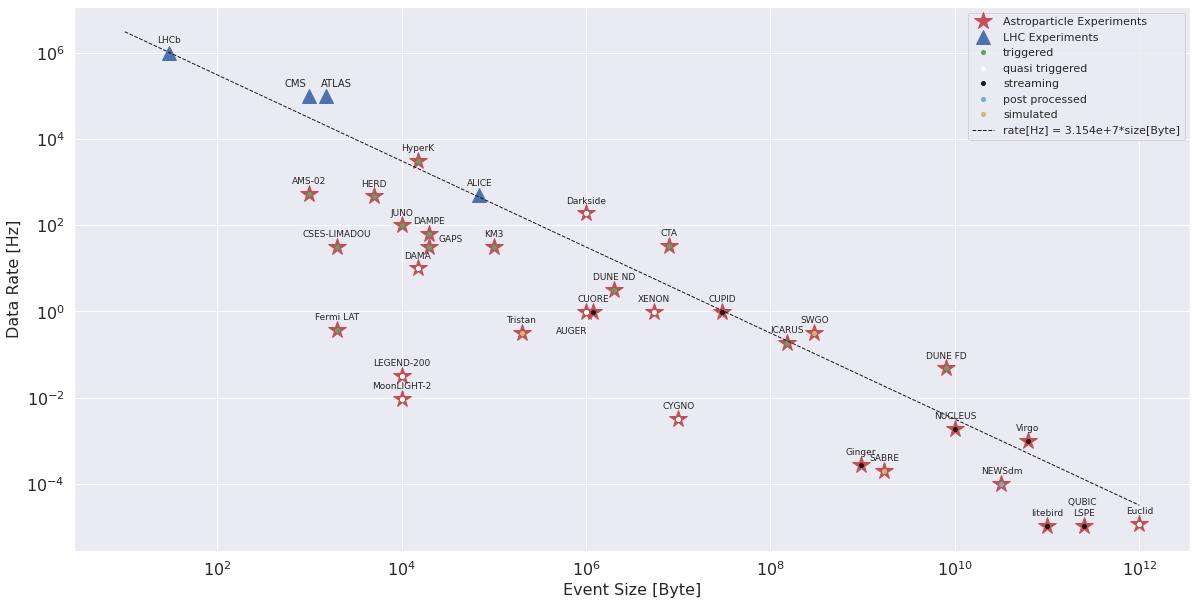

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
lhc_experiment = np.array(["ATLAS", "CMS", "LHCb", "ALICE"])
lhc_size = np.array([1.5e3,1e3,30,70e3])
lhc_rate = np.array([1e5,1e5,1e6,500])
x = np.array(pd["size KB"]*1e3)
y = np.array(pd["DAQ rate events/y"]/3.154e+7)
z = np.array(pd["DAQ type"])

ax.plot(x, y , 'r*', markersize=18, label="Astroparticle Experiments")
ax.plot(lhc_size, lhc_rate , 'b^', markersize=14, label="LHC Experiments")
ax.plot(x[z=="triggered"], y[z=="triggered"] , 'go', markersize=4, label="triggered")
ax.plot(x[z=="quasi triggered"], y[z=="quasi triggered"] , 'wo', markersize=4, label="quasi triggered")
ax.plot(x[z=="streaming"], y[z=="streaming"] , 'ko', markersize=4, label="streaming")

ax.plot(x[z=="post processed"], y[z=="post processed"] , 'co', markersize=4, label="post processed")
ax.plot(x[z=="simulated"], y[z=="simulated"] , 'yo', markersize=4, label="simulated")



# for i in range(len(x)):
#     ax.scatter(x[i], y[i] , marker='*', color=z[i], s=200)



size_day = np.logspace(1, 12, 10)
rate_day = Gain(size_day, 3.154e+7, -1)
ax.plot(size_day, rate_day , 'k--', label="rate[Hz] = 3.154e+7*size[Byte]", linewidth=1)


# popt, pcov = curve_fit(Gain,x, y, p0=[1e7, -1])
# perr = np.sqrt(np.diag(pcov))
# r2=r2_score(y, Gain(x, *popt))
# xf = np.linspace(10, 1e12, 100)
# ax.plot(xf, Gain(xf, *popt), 'k--', label='a = {0:.2e}±{1:.2e}\nb = {2:.2e}±{3:.2e} \
# \nr^2 = {4:.3f}'.format(popt[0], perr[0], popt[1], perr[1], r2))


for i, lab in enumerate(pd["Experiment"]):
    d = 0.7 # 1.2 if i%2 == 0 else 1.1
    if lab == "AUGER":
      plt.annotate(lab, (x[i]-(x[i]*0.3),y[i]-(y[i]*0.7)), ha='center', size=9) 
    elif lab == "GAPS":
      plt.annotate(lab, (x[i]+(x[i]*d),y[i]+(y[i]*0.3)), ha='center', size=9) 
    else:
      plt.annotate(lab, (x[i],y[i]+(y[i]*d)), ha='center', size=9) 


plt.annotate(lhc_experiment[0], (lhc_size[0]+lhc_size[0]*0.3,lhc_rate[0]+(lhc_rate[0]*0.7)), ha='center', size=10) 
plt.annotate(lhc_experiment[1], (lhc_size[1]-lhc_size[1]*0.3,lhc_rate[1]+(lhc_rate[1]*0.7)), ha='center', size=10) 
plt.annotate(lhc_experiment[2], (lhc_size[2],lhc_rate[2]+(lhc_rate[2]*0.7)), ha='center', size=9) 
plt.annotate(lhc_experiment[3], (lhc_size[3],lhc_rate[3]+(lhc_rate[3]*0.7)), ha='center', size=9) 

# for i, lab in enumerate(lhc_experiment):
#     d = -0.3 if i%2 == 0 else 0.3
#     plt.annotate(lab, (lhc_size[i]+lhc_size[i]*d,lhc_rate[i]-(lhc_rate[i]*0.7)), ha='center', size=9) 

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Event Size [Byte]", size = 16)
ax.set_ylabel("Data Rate [Hz]", size = 16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend()
plt.show()

In [12]:
sa = 3.154e+7
b = sa/1000
b = 2e15/3.2e+04/1e3
"{:.1e}".format(b)


'6.2e+07'

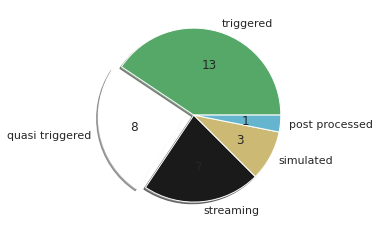

In [13]:
colors = ["g", "w", "k", "y", "c"]
explode = [0, 0.1, 0, 0, 0]
elements = len(pd["DAQ type"])
pd.value_counts(pd["DAQ type"]).plot(kind='pie', autopct=lambda x: '{:.0f}'.format(x*elements/100), label="", 
                                     colors=colors, shadow=True, explode=explode)
plt.show()

In [14]:
z

array(['triggered', 'quasi triggered', 'triggered', 'streaming',
       'triggered', 'quasi triggered', 'post processed', 'triggered',
       'triggered', 'triggered', 'quasi triggered', 'triggered',
       'triggered', 'triggered', 'streaming', 'quasi triggered',
       'quasi triggered', 'streaming', 'simulated', 'quasi triggered',
       'quasi triggered', 'quasi triggered', 'triggered', 'streaming',
       'streaming', 'streaming', 'triggered', 'triggered', 'simulated',
       'triggered', 'streaming', 'simulated'], dtype=object)

In [15]:
z = np.array(pd["DAQ type"])

In [16]:
z

array(['triggered', 'quasi triggered', 'triggered', 'streaming',
       'triggered', 'quasi triggered', 'post processed', 'triggered',
       'triggered', 'triggered', 'quasi triggered', 'triggered',
       'triggered', 'triggered', 'streaming', 'quasi triggered',
       'quasi triggered', 'streaming', 'simulated', 'quasi triggered',
       'quasi triggered', 'quasi triggered', 'triggered', 'streaming',
       'streaming', 'streaming', 'triggered', 'triggered', 'simulated',
       'triggered', 'streaming', 'simulated'], dtype=object)